# Consolidated Statement of Operations

In [8]:
import matplotlib.pyplot as plt
from pydantic import BaseModel, computed_field

In [22]:
class NetSales(BaseModel):
    products: dict[str, int]
    services: dict[str, int]
    
    @computed_field
    @property
    def totals(self) -> dict[str, int]:
        return {
            year: self.products[year] + self.services[year]
            for year in self.products.keys()
        }
    
    def _pct_change(self, current: int, previous: int) -> float:
        return ((current - previous) / previous) * 100
    
    def _calc_yoy_change(self, data: dict[str, int], year: str) -> tuple[float, str] | None:
        years = sorted(data.keys(), reverse=True)
        
        if year not in years:
            raise ValueError(f'you requested data for {year=}')
        
        year_index = years.index(year)
        if year_index >= len(years) - 1:
            raise ValueError(f'you requested data for {year=} and there is no data for previous year')
        
        prev_year = years[year_index + 1]
        return self._pct_change(data[year], data[prev_year]), prev_year
    
    def print_yoy_changes(self):
        print("Year-over-Year % changes on sales:\n")
        
        for category_name in ['Products', 'Services', 'Total']:
            data = getattr(self, category_name.lower() + ('s' if category_name == 'Total' else ''))
            print(f"{category_name}:")
            
            for year in sorted(data.keys(), reverse=True)[:-1]:
                result = self._calc_yoy_change(data, year)
                if result:
                    change, prev = result
                    print(f"  {prev} to {year}: {change:.2f}%")
            print()

    # TODO: update the periods as we get more data.
    def plot_yoy_changes(self):    
        categories = ['Products', 'Services', 'Total']
        period_1 = []  # 2022 to 2023
        period_2 = []  # 2023 to 2024
        
        for category in categories:
            data = getattr(self, category.lower() + ('s' if category == 'Total' else ''))
            years = sorted(data.keys(), reverse=True)
            
            # 2023 to 2024.
            change_24, _ = self._calc_yoy_change(data, years[0])
            period_2.append(change_24)
            
            # 2022 to 2023.
            change_23, _ = self._calc_yoy_change(data, years[1])
            period_1.append(change_23)
        
        x = range(len(categories))
        width = 0.35 # arbitrary - trying to make the bars look nice and not too cramped or too separated.
        
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.bar([i - width/2 for i in x], period_1, width, label='2022 to 2023', alpha=0.8)
        ax.bar([i + width/2 for i in x], period_2, width, label='2023 to 2024', alpha=0.8)
        
        ax.set_ylabel('YoY % Change')
        ax.set_title('AAPL Net Sales - Year-over-Year Growth')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend()
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

Year-over-Year % changes on sales:

Products:
  2023 to 2024: -1.08%
  2022 to 2023: -5.73%

Services:
  2023 to 2024: 12.87%
  2022 to 2023: 9.05%

Total:
  2023 to 2024: 2.02%
  2022 to 2023: -2.80%



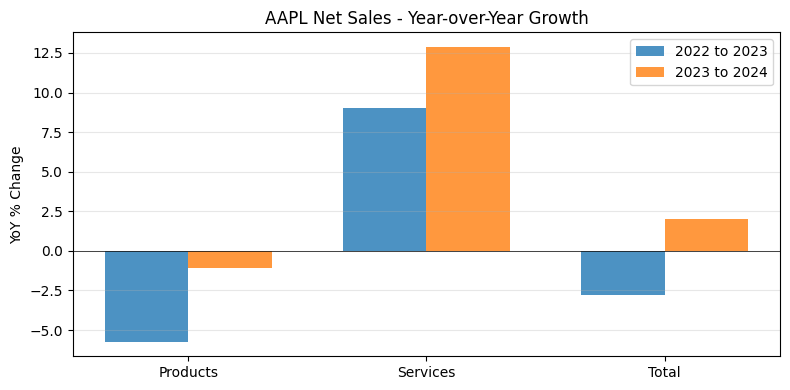

In [23]:
net_sales = NetSales(
    products={
        '2024': 294_866,
        '2023': 298_085,
        '2022': 316_199,
    },
    services={
        '2024': 96_169,
        '2023': 85_200,
        '2022': 78_129,
    }
)

net_sales.print_yoy_changes()
net_sales.plot_yoy_changes()